In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from gensim.models import LdaModel
import pandas as pd
import ecopy as ep # n.b it is crucial to install. you have to open new environments and follwo the instruction from ecopy
import seaborn as sns
import json
from scipy import stats
from scipy.stats import t
import pingouin as pg

C:\Users\minha\Anaconda3\envs\old_network\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\minha\Anaconda3\envs\old_network\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
nTopics = 11

In [3]:
# Load model

lda_model = LdaModel.load(f'pickled_1907/trained_models/trained_lda_model_{nTopics}.model')



# Load topic distributions

distribution_file_name = f'pickled_1907/topic_distribution//topic_distributions_{nTopics}.npy'
topic_distributions = np.load(distribution_file_name)


# Pull topics

# Pull topics
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)



# load raw corpus dataframe

with open('pickled_1907/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

In [4]:
years = np.unique(corpus_df['Year'])

In [5]:
#count number of zero elements in topic_distributions

df_zero = pd.DataFrame(topic_distributions)


print('Non-Zero Elements:',np.count_nonzero(df_zero))
print('Zero Elements:',((74479 * 45) - np.count_nonzero(df_zero)))
print('Percentage of Zero Elements:',(((74479 * 45) - np.count_nonzero(df_zero))/(74479 * 45))*100,'%')

Non-Zero Elements: 57577
Zero Elements: 3293978
Percentage of Zero Elements: 98.28208100419059 %


In [6]:
# Create a dictionary of topic distributions by year
#topic_distributions_year['Year'][paper][topic_weights]

topic_distributions_year = {}

for y, year in enumerate(years):
    
    topic_distributions_year[year] = topic_distributions[corpus_df['Year'] == year]


In [7]:
#topic_distributions_year[2021]

In [8]:
# Define a list of diversity metrics for ecopy

diversity_metrics = ['shannon', 'spRich', 'gini-simpson', 'dominance']
diversity_metrics_3 = ['shannon', 'spRich', 'dominance']

In [9]:
# Global diversity metrics
#global_diversity['metric'][paper_diversities]


global_diversity = {}

for metric in diversity_metrics:
    
    global_diversity[metric] = ep.diversity(topic_distributions, method = metric, breakNA=False, num_equiv=False)

In [10]:
#global_diversity["shannon"]

In [11]:
# Yearwise diversity metric
# year_diversity['metric']['year'][paper_diversities]

year_diversity = {}


for metric in diversity_metrics:
    
    year_diversity[metric] = {}
    
    for y, year in enumerate(years):
        
        year_diversity[metric][year] = ep.diversity(topic_distributions_year[year], method = metric, breakNA=False, num_equiv=False)



In [12]:
#global_diversity['shannon'].shape

In [13]:
#topic_distributions[:,1].shape

In [14]:
import time
saving_path="C:/Users/minha/Desktop/plots_new/updated/"
font = {'family' : "Arial",
         'weight' : 'normal',
         'size'   : 14}
plt.rc('font', **font)

In [15]:
import pandas as pd
year_diversity_avg = {}
for y, year in enumerate(year_diversity["shannon"].keys()):
    year_diversity_avg[year] = year_diversity["shannon"][year].mean()
    

In [16]:
year_diversity_mean = pd.DataFrame.from_dict(year_diversity["shannon"],orient="index")
x=year_diversity_mean.T
diversity_1992to2021=x.loc[:,1992:2021]
#diversity_1992to2021.mean().min()

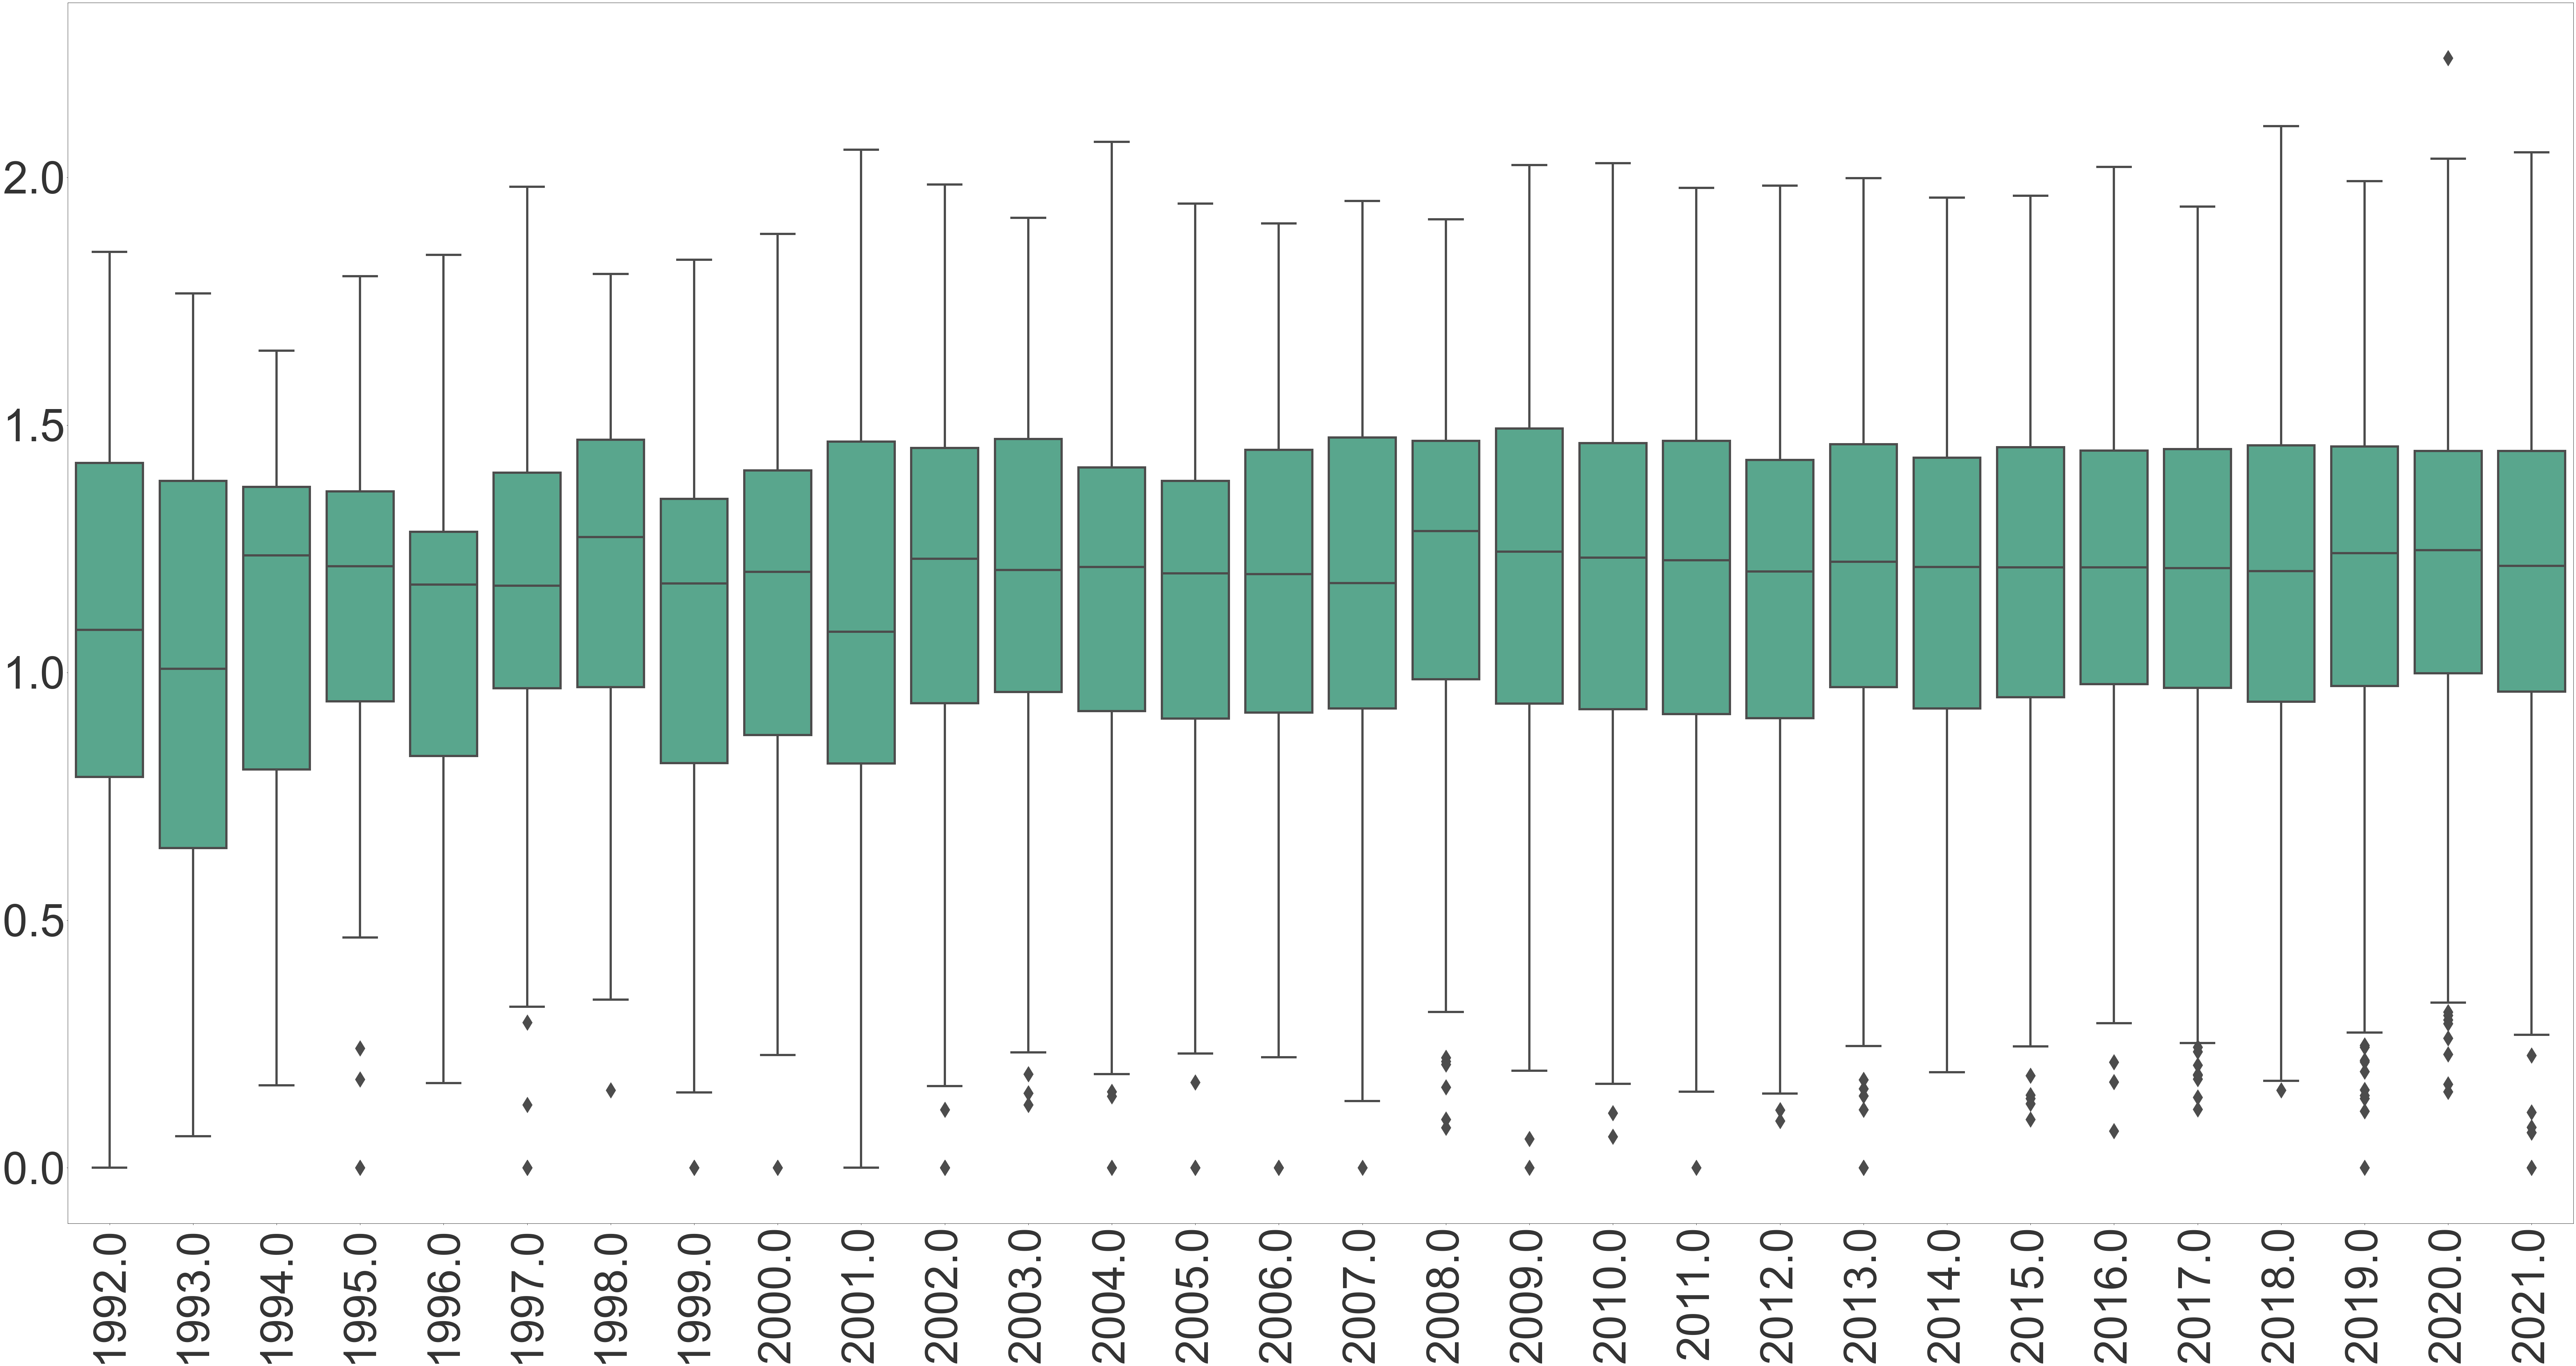

In [17]:
#Average shannon diversity of the topics by box plot
fig = plt.figure(figsize=(120,60), facecolor='white')
sns.boxplot(data=diversity_1992to2021,color="#4CB391",fliersize=30,linewidth=6)
plt.xticks(np.arange(0, 30, step=1),rotation = 90,alpha=0.8,size=120)
plt.yticks(alpha=0.8,size=120);
#plt.tick_params(axis="y", labelsize=90)
#ax.set_xticklabels(xlabels,alpha=0.6,rotation = 90,size=80)
#ylabels = [ylabel.get_text() for ylabel in ax.get_yticklabels()]
#ax.yaxis.set_ticks(np.arange(start, end, 0.3),labelsize=80)
#ax.set_yticklabels(np.arange(start, end, 0.2),alpha=0.6,size=80)
#plt.tick_params(axis="x", labelsize=80)
#plt.tick_params(axis="x", labelsize=80)
#plt.savefig(saving_path+"average_shanon_diversity_per_year_"+ time.strftime("%Y-%m-%d %H%M%S")+".png",dpi=150)

In [18]:
# Define topic names (25)

if nTopics == 11:
    topic_names = ['Modeling & Forecasting', 'Precipiatation and Extremes', 'Climate Change', 'Urban Risk Management', 
                   'River Hydraulics',"Wetland & Ecology",'Groundwater & Soil Chemistry',"Geomorphology",
                  "Soil hydrology","Coastal hydrology","Reservoir"]

In [19]:
topic_colors = ['steelblue','darkorchid', 'seagreen','slategrey','darkturquoise','tomato','lightcoral',
                  'indigo','burlywood','blueviolet','firebrick']

In [20]:
# changig font for plotting
font = {'family' : "Arial",
         'weight' : 'normal',
         'size'   : 16}
plt.rc('font', **font)

In [21]:
# Calculate r values per metric and plotting them.


r_vals_global = {}


for metric in diversity_metrics_3:
    
    r_vals_global[metric] = {}
    
    for t, topic in enumerate(topic_names):

        r_vals_global[metric][topic] = np.corrcoef(topic_distributions[:,t],global_diversity[metric])[0,1]


fig = plt.figure(figsize=(150,100), facecolor='white')


# plot numbering starts at 1, not 0
plot_number = 1

# for metric in diversity_metrics:
ax = fig.add_subplot(1, 1, plot_number)
ax.bar(topic_names, r_vals_global['shannon'].values(), color = topic_colors)
ax.tick_params(axis="x", labelsize=160)
ax.tick_params(axis="y", labelsize=160)
#ax.set_ylim(-0.3,0.3)
#ax.set_title('R-values for Statistical Relationship Between Per-Article Shannon Diversity & Topic Distributions', size = 150)
# Go to the next plot for the next loop
plot_number = plot_number + 1
plt.xticks(rotation = 90)
ax.grid()
plt.tight_layout()
plt.savefig(saving_path+"R values between shanon diversity and topic ditributions_"+ time.strftime("%Y-%m-%d %H%M%S")+".jpg",dpi=100)

In [22]:
#r_vals_global['shannon']

{'Modeling & Forecasting': 0.14880802317109443,
 'Precipiatation and Extremes': 0.2127046741235247,
 'Climate Change': 0.11697801423615369,
 'Urban Risk Management': 0.1605577445571071,
 'River Hydraulics': 0.1470670459809055,
 'Wetland & Ecology': 0.0817464958961046,
 'Groundwater & Soil Chemistry': 0.009395921339988286,
 'Geomorphology': -0.11993924860615153,
 'Soil hydrology': 0.2633689053012035,
 'Coastal hydrology': 0.24786085455863616,
 'Reservoir': -0.477253745726023}